In [253]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV



In [254]:
Income_Forecast = pd.read_csv("Turkey.csv")


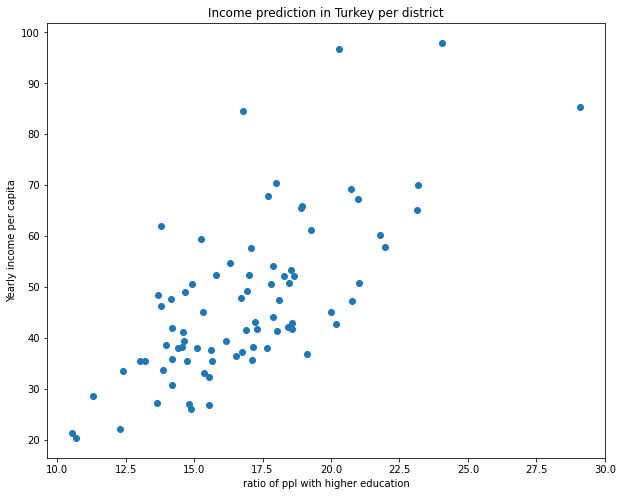

In [255]:

plt.figure(figsize=(10,8))
plt.scatter(Income_Forecast.ratio_of_HigherEducation,Income_Forecast.Y_Income_PerCapita)
plt.xlabel('ratio of ppl with higher education')
plt.ylabel('Yearly income per capita')
plt.title('Income prediction in Turkey per district')
plt.show()

In [256]:
Political_opinions = pd.read_csv("data.csv")


In [257]:
Political_opinions.drop(columns='Timestamp',axis=1,inplace=True)
print(Political_opinions)

    Cinsiyet    Yas    Bolge     Egitim  soru1 soru2  soru3  soru4  soru5  \
0      Erkek  18-30  Marmara     Lisans  Hayır  Evet   Evet  Hayır  Hayır   
1      Erkek  18-30  Marmara     Lisans   Evet  Evet  Hayır   Evet  Hayır   
2      Kadın  18-30  Marmara     Lisans  Hayır  Evet  Hayır  Hayır  Hayır   
3      Erkek   0-18  Marmara       Lise   Evet  Evet  Hayır   Evet  Hayır   
4      Erkek  18-30  Marmara  Ön Lisans  Hayır  Evet   Evet   Evet  Hayır   
..       ...    ...      ...        ...    ...   ...    ...    ...    ...   
163    Erkek  18-30  Marmara     Lisans  Hayır  Evet  Hayır   Evet  Hayır   
164    Erkek  18-30  Marmara     Lisans   Evet  Evet  Hayır  Hayır  Hayır   
165    Erkek  18-30  Marmara     Lisans   Evet  Evet   Evet  Hayır  Hayır   
166    Erkek  30-50  Marmara     Lisans   Evet  Evet  Hayır   Evet  Hayır   
167    Erkek  18-30  Marmara     Lisans  Hayır  Evet   Evet  Hayır  Hayır   

     soru6  soru7  soru8  soru9 soru10      parti  
0    Hayır   Evet  Hayı

In [258]:
names = ["Sex","Age","Region","Education","economy_good","education_reform",
         "against_Privatization","support_death_penalty","objective_journalists","alcohol_prohibition",
         "more_secular","abortion_ban","restricted_freedoms","support_new_party","parties"]
Political_opinions = Political_opinions.rename(columns=dict(zip(Political_opinions.columns, names)))

In [259]:
Political_opinions.replace(('Evet', 'Hayır'), (1, 0), inplace=True)


In [261]:
Political_opinions = Political_opinions.replace(dict(zip(Political_opinions['Age'].unique(),[1,0,5,3,4])))
Political_opinions = Political_opinions.replace(dict(zip(Political_opinions['Education'].unique(),[5,3,4,6,1,2])))
Political_opinions.replace(('Erkek', 'Kadın'), (1, 0), inplace=True)



In [263]:
Political_opinions

,Sex,Age,Region,Education,economy_good,education_reform,against_Privatization,support_death_penalty,objective_journalists,alcohol_prohibition,more_secular,abortion_ban,restricted_freedoms,support_new_party,parties
0,1,1,Marmara,5,0,1,1,0,0,0,1,0,1,1,IYI PARTI
1,1,1,Marmara,5,1,1,0,1,0,1,0,1,0,0,AKP
2,0,1,Marmara,5,0,1,0,0,0,0,1,0,1,1,DIĞER
3,1,0,Marmara,3,1,1,0,1,0,1,1,1,1,1,IYI PARTI
4,1,1,Marmara,4,0,1,1,1,0,0,1,1,0,0,IYI PARTI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,1,1,Marmara,5,0,1,0,1,0,1,0,1,1,1,DIĞER
164,1,1,Marmara,5,1,1,0,0,0,0,1,0,1,1,CHP
165,1,1,Marmara,5,1,1,1,0,0,0,1,0,1,1,DIĞER
166,1,3,Marmara,5,1,1,0,1,0,1,0,0,1,1,AKP


In [269]:
Edu = dict(zip([5,3,4,6,1,2],['Bachelor','High-school graduate','Diploma','Higher Education','primary-school-graduates','junior-school-graduates']))
Age = dict(zip([1,0,5,3,4],['18-30','0-18','60+','30-50','50-60']))

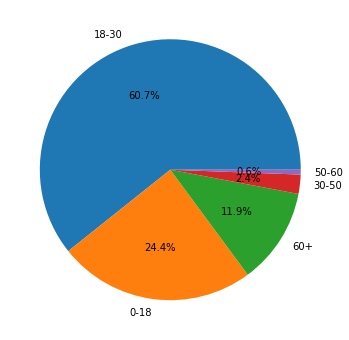

In [270]:
f, g = plt.subplots(figsize = (10, 6))
g.pie(Political_opinions["Age"].value_counts(), labels = Age.values(),autopct='%1.1f%%')
plt.show()

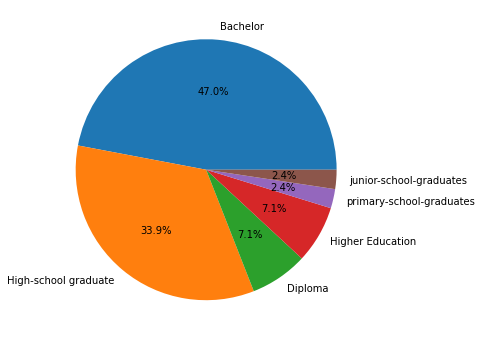

In [271]:
f, g = plt.subplots(figsize = (10, 6))
g.pie(Political_opinions["Education"].value_counts(), labels = Edu.values(),autopct='%1.1f%%')
plt.show()

# Visualization

# New Section

In [286]:
def plotData(Edu = None):
    df=Political_opinions
    questions =  ["economy_good","education_reform",
         "against_Privatization","support_death_penalty","objective_journalists","alcohol_prohibition",
         "more_secular","abortion_ban","restricted_freedoms","support_new_party"]
    Edu_dict = dict(zip([5,3,4,6,1,2],['Bachelor','High-school graduate','Diploma','Higher Education','primary-school-graduates','junior-school-graduates']))
    
    if Edu == None:
        
        fig = plt.figure(figsize=(25,25))
        
        for i in range(0,10):
            p = fig.add_subplot(4,4,i+1)
            df[questions[i]].value_counts().plot(kind = 'pie', autopct='%.1f%%'); i = i + 1
            plt.ylabel(dict(zip(('Yes', 'No'),(1,0))), fontsize = 15)
            plt.title('Overall'+ ':' + questions[i-1])
            plt.grid()
            
    else:
        
        df = df[df['Education'] == Edu]
        fig = plt.figure(figsize=(25,25))
        
        for i in range(0,10):
            p = fig.add_subplot(4,4,i+1)
            df[questions[i]].value_counts().plot(kind = 'pie', autopct='%.1f%%'); i = i + 1
            plt.ylabel(dict(zip(('Yes', 'No'),(1,0))), fontsize = 15)
            plt.title(Edu_dict[Edu]+ ':' +questions[i-1])
            plt.grid()

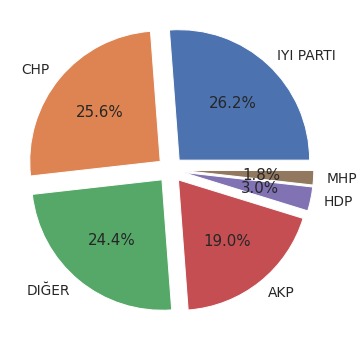

In [287]:

f, g = plt.subplots(figsize = (10, 6))
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

g.pie(Political_opinions["parties"].value_counts(), explode = explode, labels = Political_opinions["parties"].value_counts().index ,
        autopct='%1.1f%%')
plt.show()

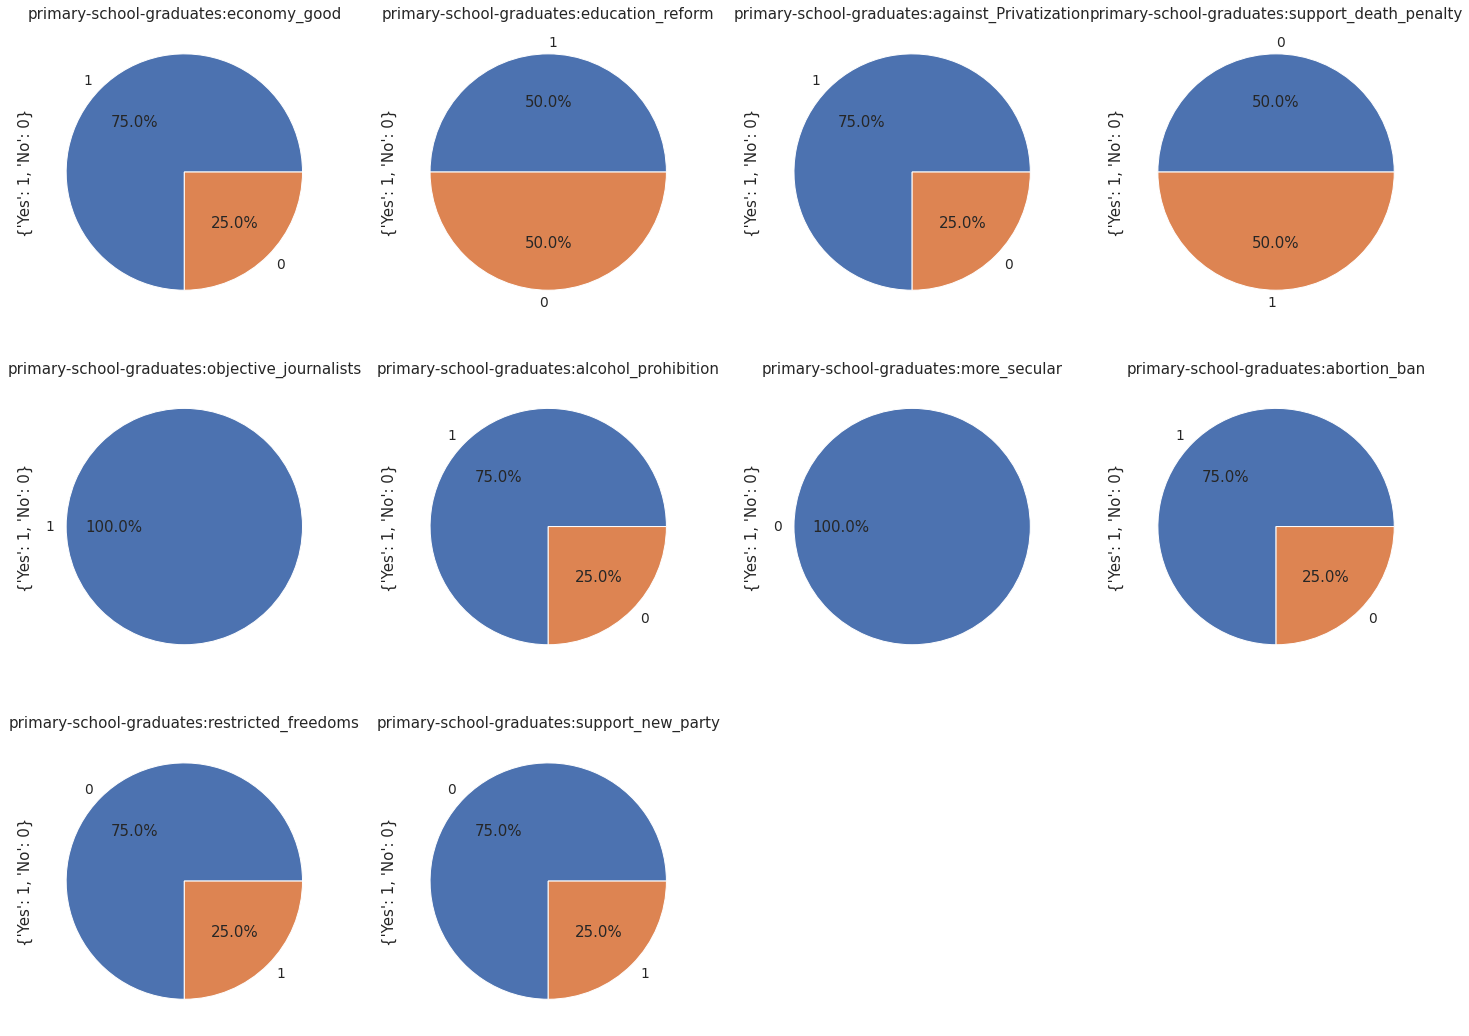

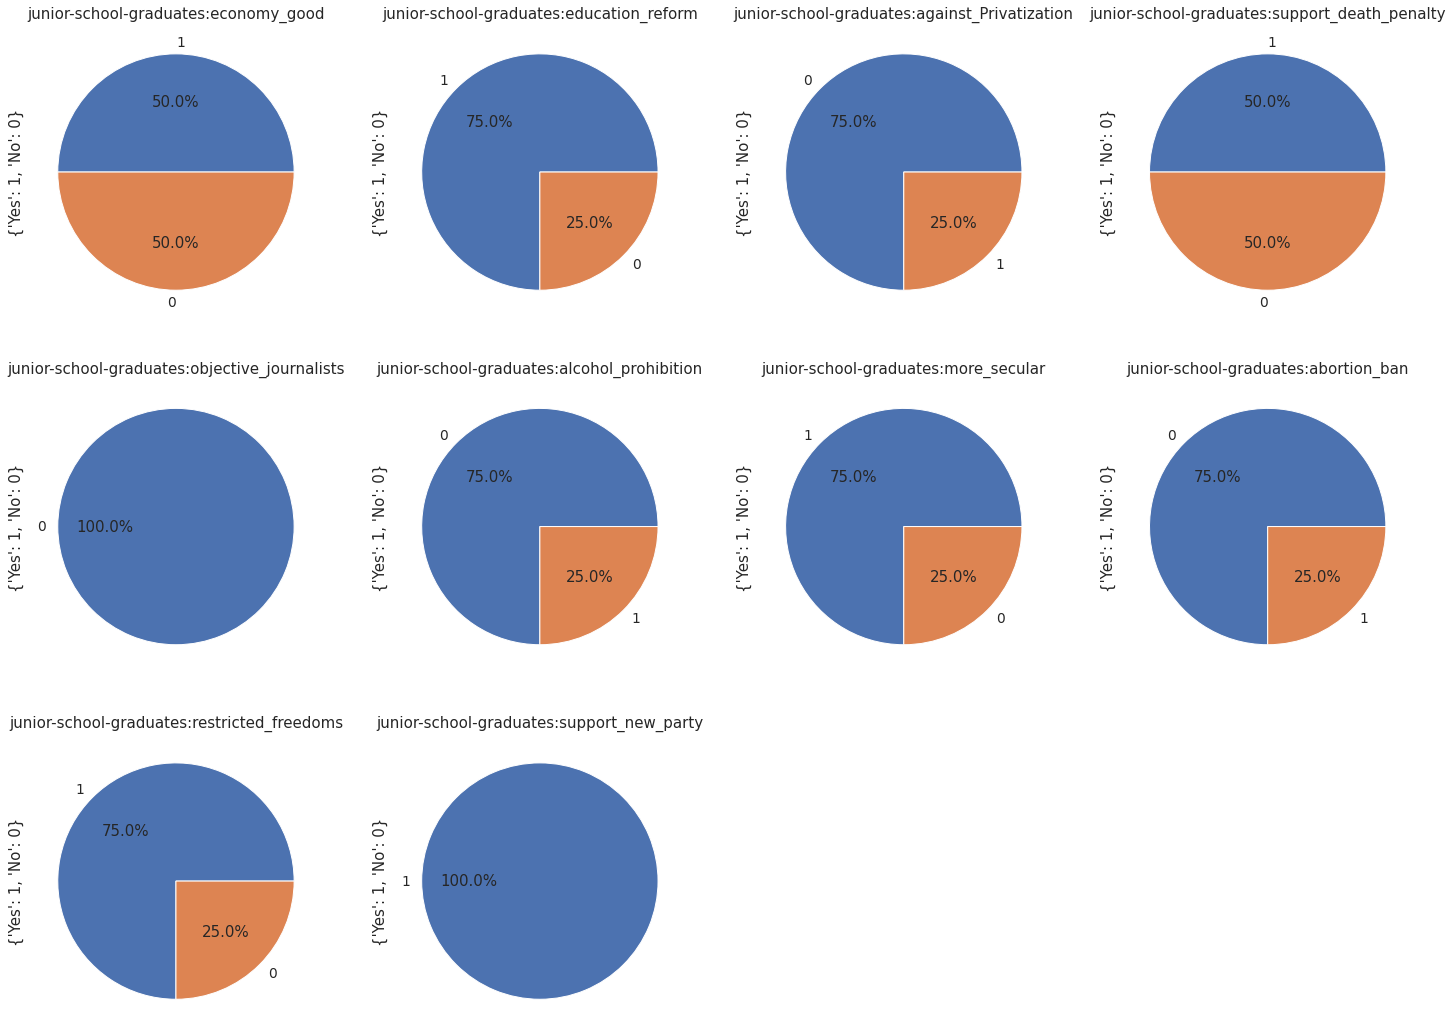

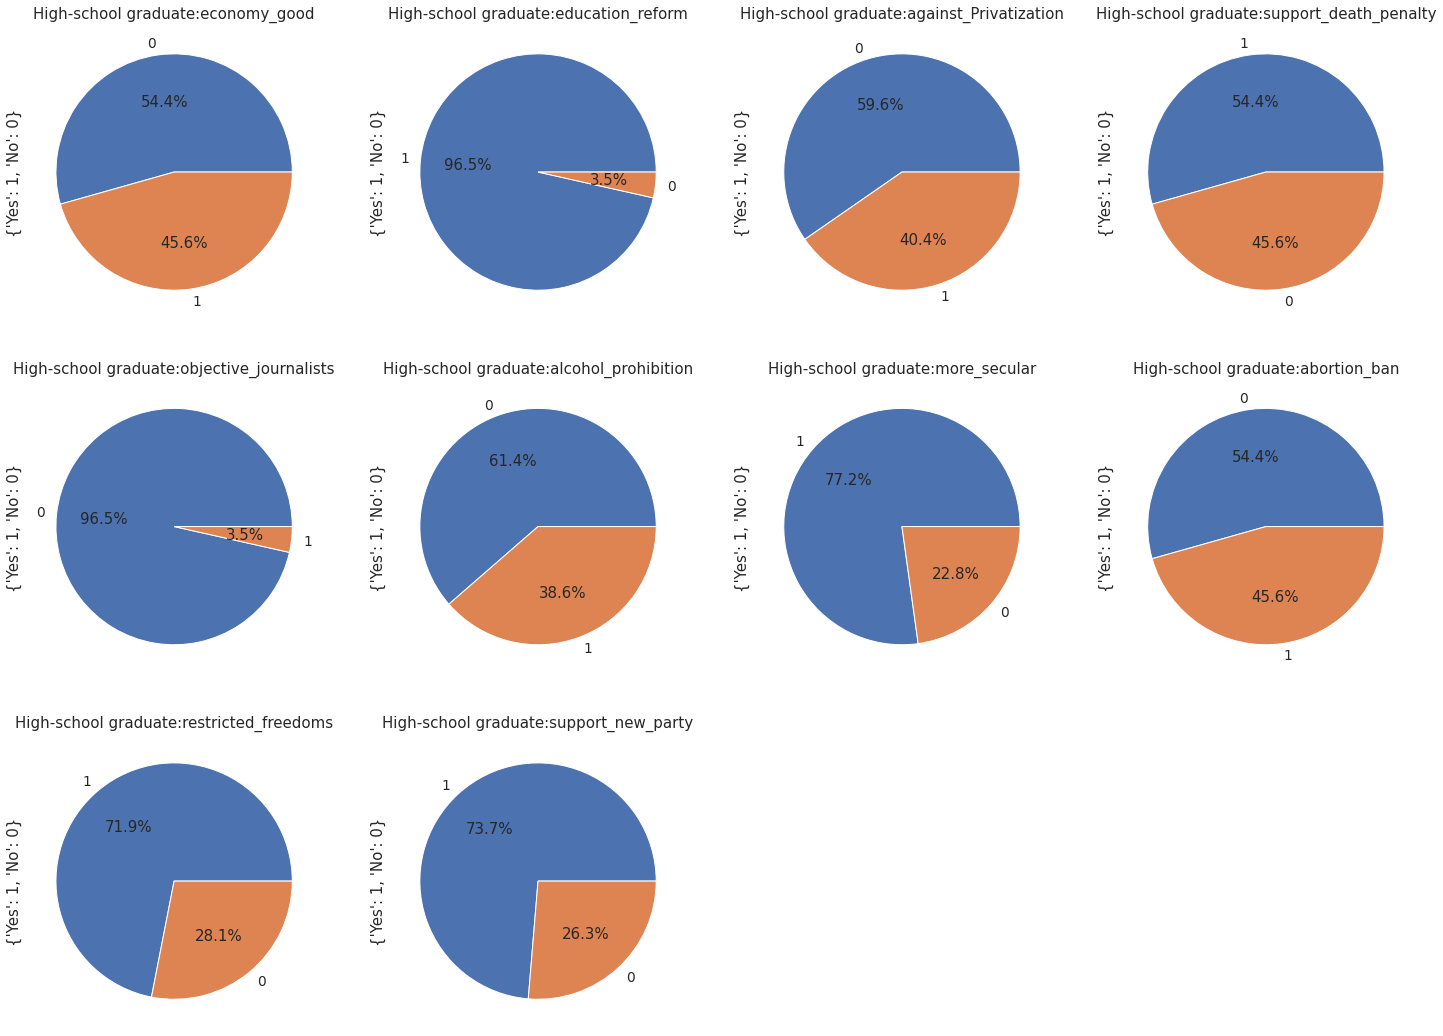

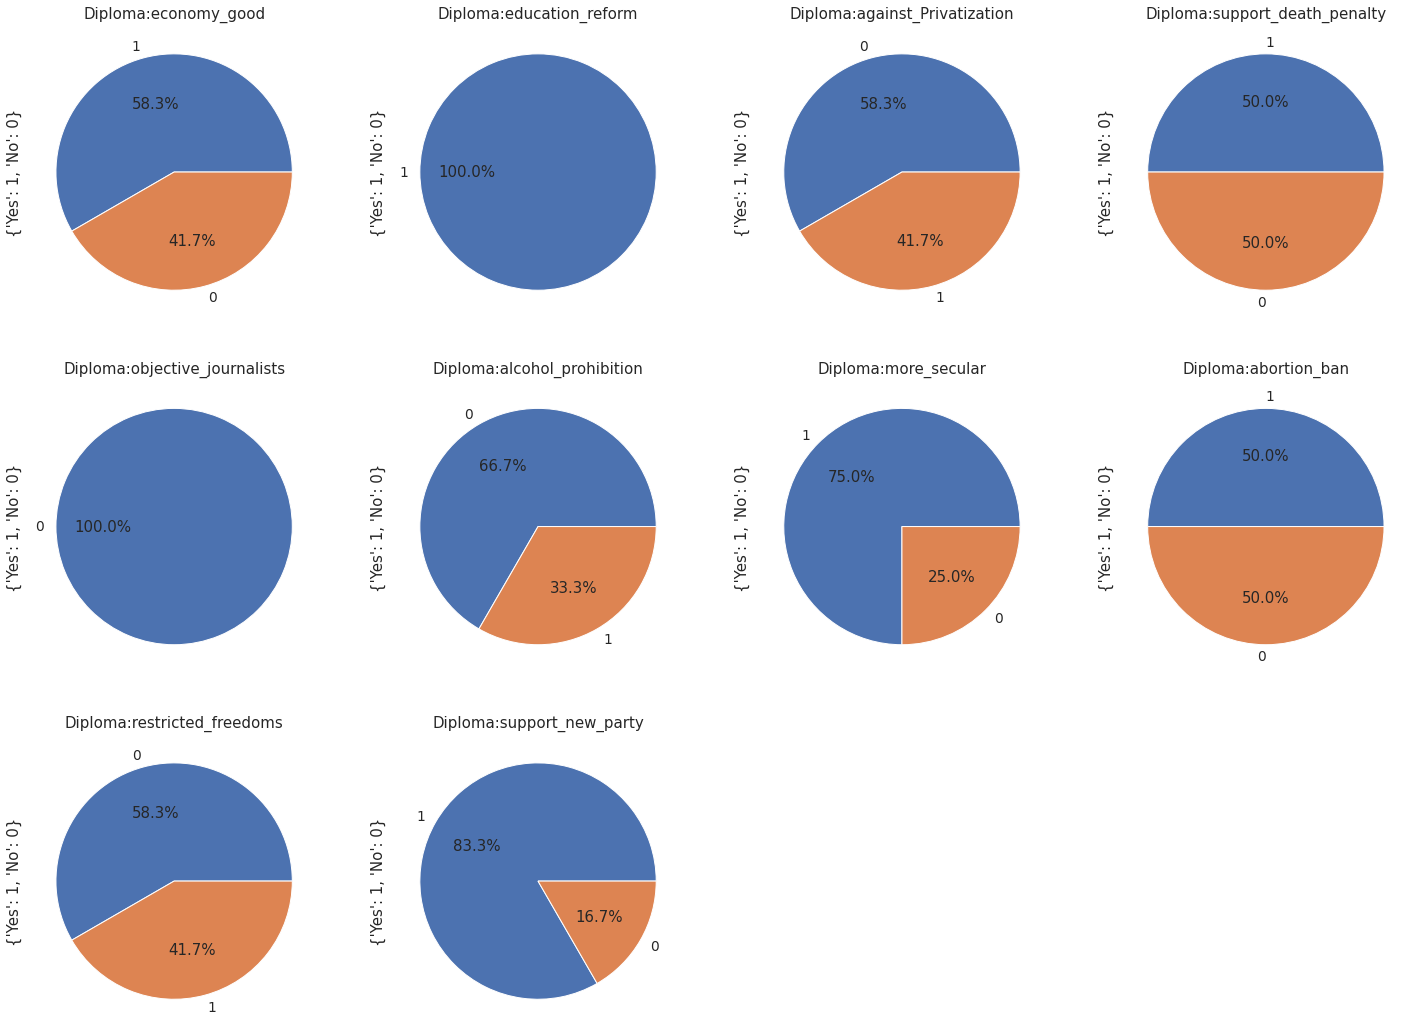

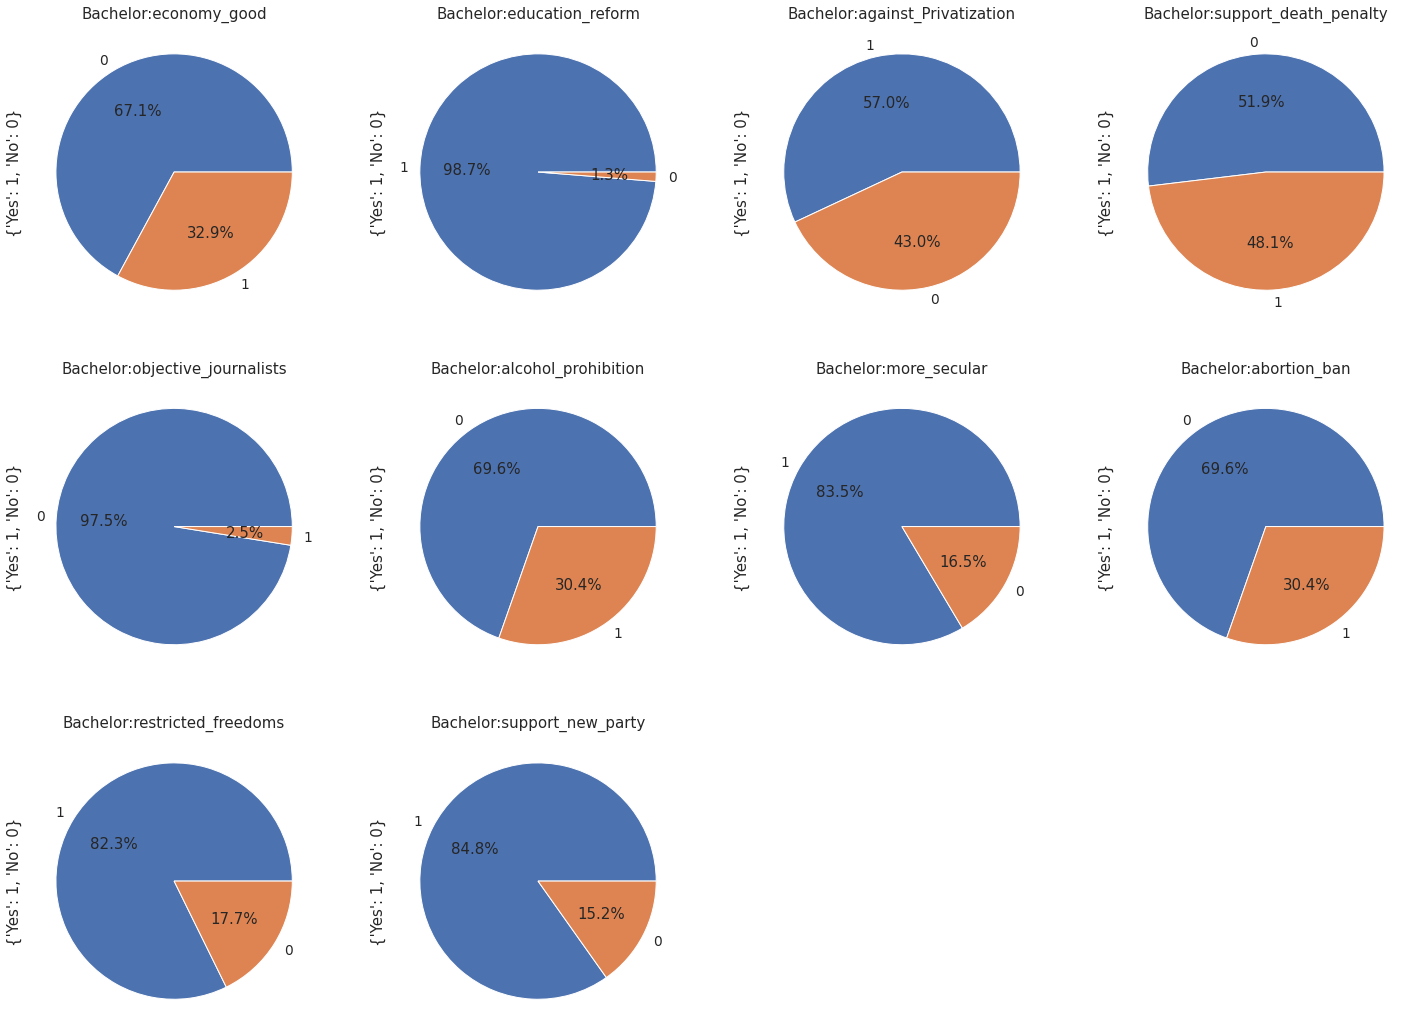

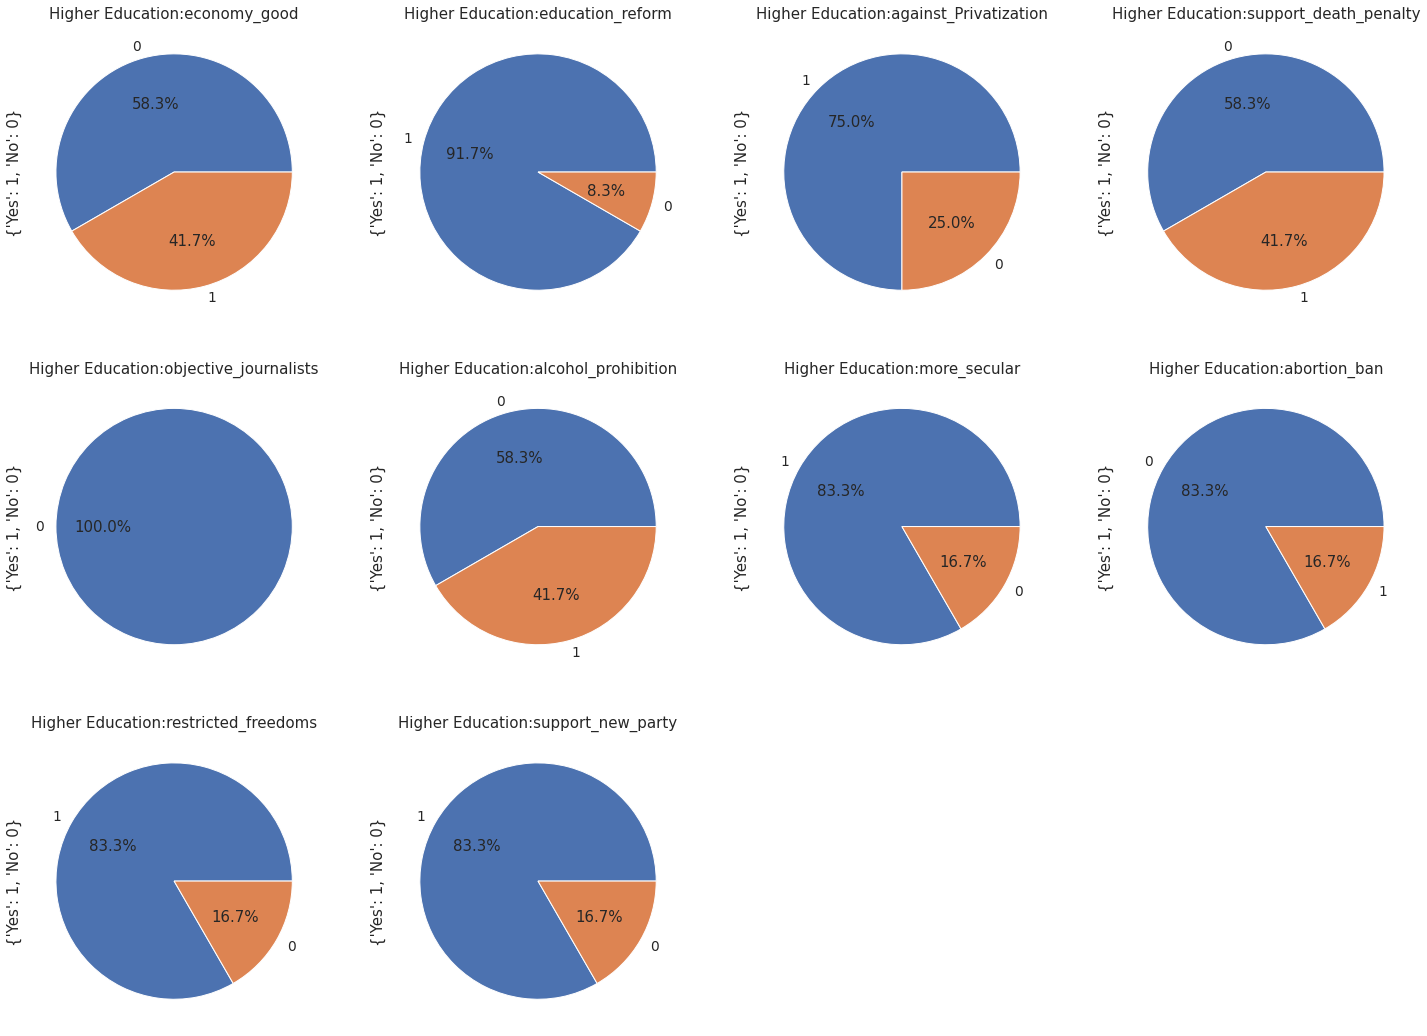

In [288]:
for j in range(1,7):
    plotData(j)


In [289]:
df = Political_opinions.drop(Political_opinions[Political_opinions['Education'] < 3].index)
df['parties'].value_counts()

IYI PARTI    43
CHP          43
DIĞER        39
AKP          28
HDP           4
MHP           3
Name: parties, dtype: int64

In [290]:
df = df.drop(df[df['parties'].isin(['HDP','MHP','AKP'])].index)

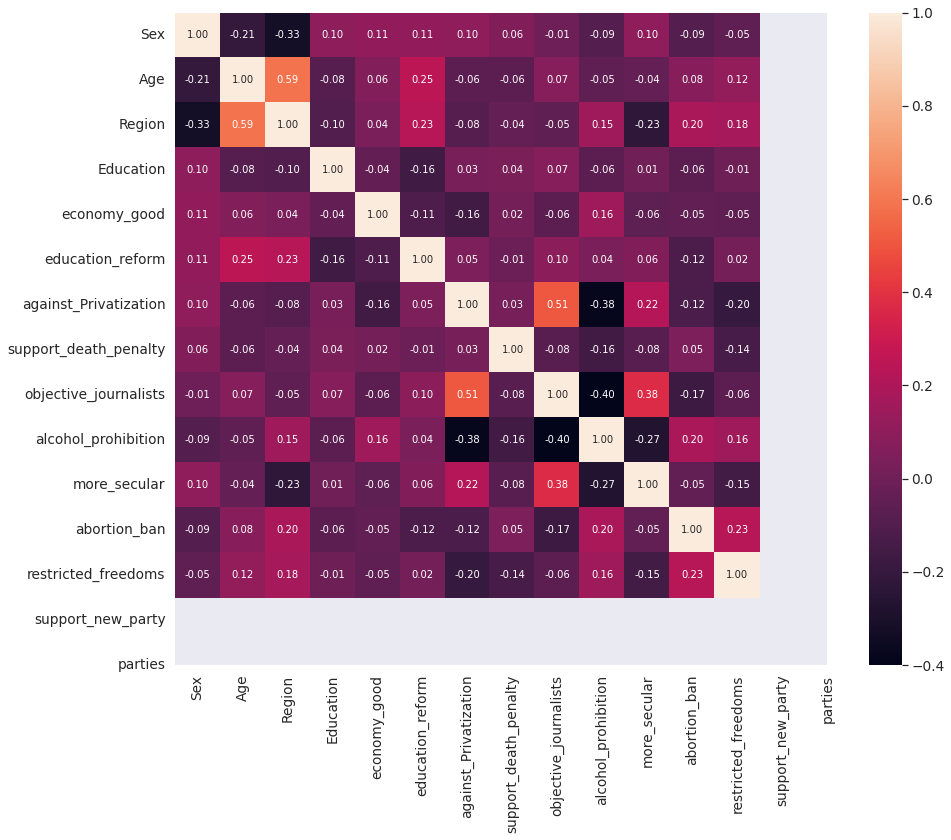

In [292]:
k = 14 
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.set(font_scale=1.25)
hm = sns.heatmap(corrmat, cbar=True, annot=True, square=True, fmt='.2f', 
                 annot_kws={'size': 10}, yticklabels=names, xticklabels=names)
plt.show()

In [293]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [296]:
from sklearn.preprocessing import LabelEncoder
lr = LabelEncoder()
df['parties'] = lr.fit_transform(df['parties'])
df['Region'] = lr.fit_transform(df['Region'])

In [297]:
from sklearn.model_selection import train_test_split
predictors = df.drop(['parties'], axis=1)
target = df["parties"]
X_train, x_test, Y_train, y_test = train_test_split(predictors, target, test_size = 0.25, random_state= 41)

In [298]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=41)
X_train_s, Y_train_s = sm.fit_resample(X_train, Y_train)

In [299]:
dt = DecisionTreeClassifier()
dt.fit(X_train_s, Y_train_s)
dt_pred = dt.predict(x_test)
cnf_matrix = confusion_matrix(y_test, dt_pred)
print(classification_report(y_test,dt_pred))

              precision    recall  f1-score   support

           0       0.40      0.50      0.44         8
           1       0.46      0.67      0.55         9
           2       0.67      0.40      0.50        15

    accuracy                           0.50        32
   macro avg       0.51      0.52      0.50        32
weighted avg       0.54      0.50      0.50        32



In [300]:
rfc = RandomForestClassifier()
rfc.fit(X_train_s,Y_train_s)
rfc_pred = rfc.predict(x_test)
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.44      0.50      0.47         8
           1       0.44      0.78      0.56         9
           2       0.43      0.20      0.27        15

    accuracy                           0.44        32
   macro avg       0.44      0.49      0.43        32
weighted avg       0.44      0.44      0.40        32



In [301]:
mlpc = MLPClassifier(hidden_layer_sizes=200,max_iter = 500)
mlpc.fit(X_train_s,Y_train_s)
mlpc_pred =mlpc.predict(x_test)
print(classification_report(y_test,mlpc_pred))

              precision    recall  f1-score   support

           0       0.50      0.62      0.56         8
           1       0.46      0.67      0.55         9
           2       0.56      0.33      0.42        15

    accuracy                           0.50        32
   macro avg       0.51      0.54      0.51        32
weighted avg       0.52      0.50      0.49        32



/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
